## Random Forest para Arboles de Clasificación

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [27]:
dataset=pd.read_csv('../python-ml-course/datasets/iris/iris.csv')
dataset.shape

(150, 5)

In [28]:
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
predictors=dataset.columns.values.tolist()[:4]
target=dataset.columns.values.tolist()[4]

In [30]:
#Se crean conjuntos de entrenamiento
dataset['is_train']=np.random.uniform(0,1,len(dataset))<=.75 
train,test=dataset[dataset['is_train']==True],dataset[dataset['is_train']==False]

In [31]:
#Se crea modelo con el metodo de entropia y un minimo de 20 muestras por nodo, con la semilla 99 para el propio metodo
model=DecisionTreeClassifier(criterion='entropy',min_samples_split=20,random_state=99) 

model.fit(train[predictors],train[target])#se entrena

predicciones=model.predict(test[predictors])#se realizan predicicones

pd.crosstab(test[target],predicciones,rownames=['Valor Real'],colnames=['Valor Predicho'])

Valor Predicho,setosa,versicolor,virginica
Valor Real,,,
setosa,11,0,0
versicolor,0,9,1
virginica,0,0,14


### Visualizacion de Arbol

In [32]:
from sklearn.tree import export_graphviz

In [33]:
with open('iris-dtree.dot','w') as dotfile: #creamos un archivo llamado iris-dtree.dot
    export_graphviz(model,out_file=dotfile,feature_names=predictors) #seteamos los parametros(modelo,archivo,predictores)
    dotfile.close()

In [34]:
import os
from graphviz import Source #(conda install python-graphviz)

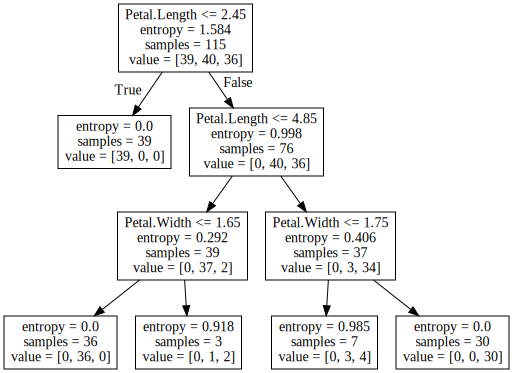

In [35]:
file=open('iris-dtree.dot','r')
text=file.read()
Source(text)

### Validacion Cruzada para la poda del arbol

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X=dataset[predictors]

Y=dataset[target]

In [37]:
for i in range(1,11): #bucle para validar con que profundidad (max_depth) se obtiene un mejor score
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y) #min_samples_split=numero min de muestras por rama
    
    cross_validation=KFold(n_splits=10,shuffle=True,random_state=1) #n_splits=numero de iteraciones
    
    scores=cross_val_score(tree,X,Y,scoring='accuracy',cv=cross_validation)
    score=np.mean(scores) #score basado en la exactitud (mas cercano a 100 es mejor)
    
    print("Score para i = ",i," es de ", score)
    print('')
    print("Rasgos Clasificadores relevantes para este arbol:\n",list(zip(predictors,tree.feature_importances_)))#variables importantes
    print('')
    print('')

Score para i =  1  es de  0.5666666666666667

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Petal.Length', 1.0), ('Petal.Width', 0.0)]


Score para i =  2  es de  0.9200000000000002

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Petal.Length', 0.6662028463448376), ('Petal.Width', 0.3337971536551623)]


Score para i =  3  es de  0.9400000000000001

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Petal.Length', 0.6897698149958357), ('Petal.Width', 0.3102301850041643)]


Score para i =  4  es de  0.9333333333333333

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Petal.Length', 0.6686915796639514), ('Petal.Width', 0.33130842033604857)]


Score para i =  5  es de  0.9333333333333333

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Peta

# Random Forests

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
forest=RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=10)
forest.fit(train[predictors],train[target])

/home/jess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [40]:
forest.oob_score_

0.9130434782608695

In [41]:
forest_clasify=forest.oob_decision_function_
forest_clasify

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [       nan,        nan,        nan],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.